# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


# Data Reading

In [2]:
# import the drive module
from google.colab import drive
# mount the google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/Data/HomeC.csv")
data.head()


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [4]:
# Get the number of rows and columns in the DataFrame
num_rows, num_columns = data.shape

# Print the number of rows and columns
print(f"The DataFrame has {num_rows} rows and {num_columns} columns.")


The DataFrame has 503911 rows and 32 columns.


In [5]:
# print all the columns present in the dataframe
print(data.columns)

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')


In [6]:
# Display summary information about the 'data' DataFrame, including column types and non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [7]:
# Generate descriptive statistics for the 'data' DataFrame.
data.describe()


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,...,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,...,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,...,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,...,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,...,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,...,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,...,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,...,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


# Data Preprocessing

In [8]:
import pandas as pd

# Convert Unix timestamp to datetime and handle errors by coercing them to NaT
data['time'] = pd.to_datetime(data['time'], unit='s', errors='coerce')

# Drop rows where 'time' is NaT
data = data.dropna(subset=['time'])

# Ensure that the 'time' column has been converted to datetime correctly
if not pd.api.types.is_datetime64_any_dtype(data['time']):
    data['time'] = pd.to_datetime(data['time'])

# Create a new DatetimeIndex with a frequency of one minute starting from the minimum 'time' value
# Correcting the usage from DatetimeIndex to date_range
data['time'] = pd.date_range(start=data['time'].min(), periods=len(data), freq='min')

# Set 'time' as the DataFrame index
data = data.set_index('time')

# Display the first 2 rows
data.head(2)


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [9]:
#  display the unique weather descriptions from the 'summary' column of the DataFrame.
data['summary'].unique()


array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [10]:
# display the unique values from the 'cloudCover' column in the DataFrame.
data['cloudCover'].unique()


array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

# Data Cleaning

In [11]:
# 1. Remove '[kW]' from column names for simplicity and better readability
data.columns = [col.replace(' [kW]', '') for col in data.columns]

# 2. Sum up the consumption for 'Furnace' and 'Kitchen' by summing up the related columns
data['Furnace'] = data[['Furnace 1', 'Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12', 'Kitchen 14', 'Kitchen 38']].sum(axis=1)

# 3. Drop unnecessary columns
data.drop(['Furnace 1', 'Furnace 2', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'icon', 'summary'], axis=1, inplace=True)

# 4. Clean 'cloudCover' data by replacing invalid values with backfill method
data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

# 5. Reorder the columns
columns_order = ['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
                 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room',
                 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility',
                 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing',
                 'precipIntensity', 'dewPoint', 'precipProbability']

data = data[columns_order]

# Display the first 2 rows of the modified DataFrame
data.head(2)


,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.12415,0.006983,0.013083,0.03135,0.001017,...,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.12400,0.006983,0.013117,0.03150,0.001017,...,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


### Energy Features

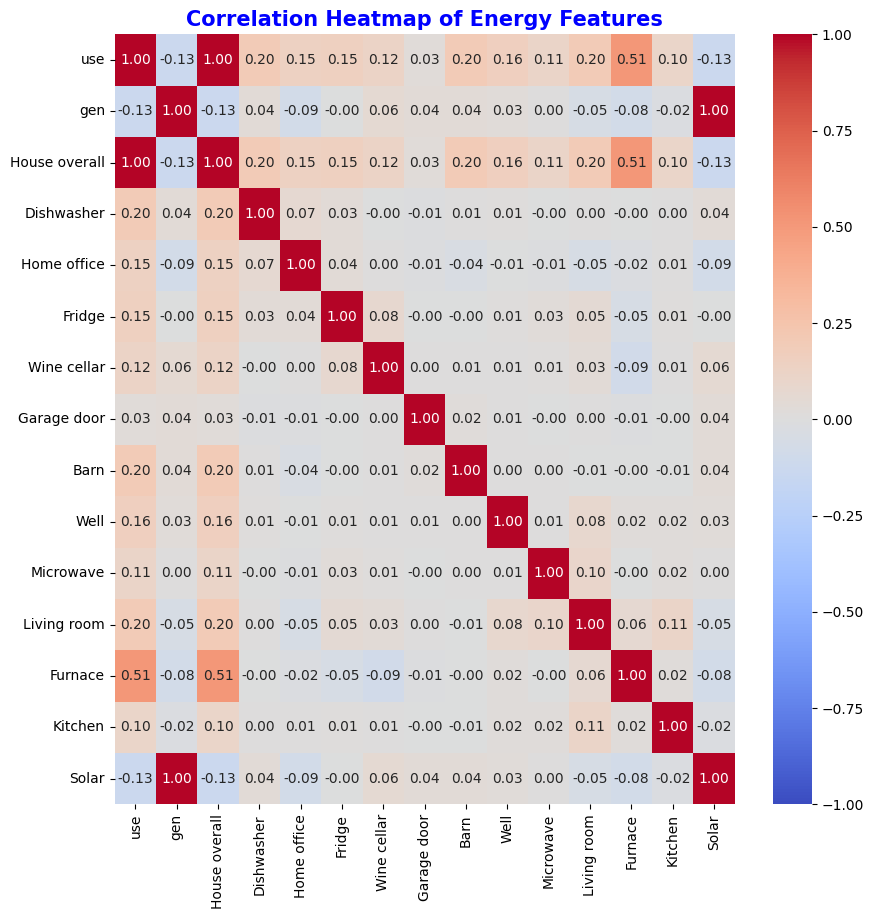

In [12]:
# Checking Correlations Among Energy Features
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap for the correlation matrix of the first 15 columns
corr_matrix = data[data.columns[0:15].tolist()].corr()
# Use a different colormap, e.g., 'coolwarm'
sns.heatmap(corr_matrix, annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0, cmap='coolwarm', ax=ax)

# Set a new, descriptive title for the heatmap with bold and colorful font
plt.title('Correlation Heatmap of Energy Features', fontsize=15, fontweight='bold', color='blue')

# Display the heatmap
plt.show()


### Checking Column Equality:



In [13]:
# Check if 'gen' and 'Solar', 'use' and 'House overall' are identical columns
# because they got perfect correlation (correlation value = 1) between these pairs.
print(data['gen'].equals(data['Solar']))
print(data['use'].equals(data['House overall']))


True
True


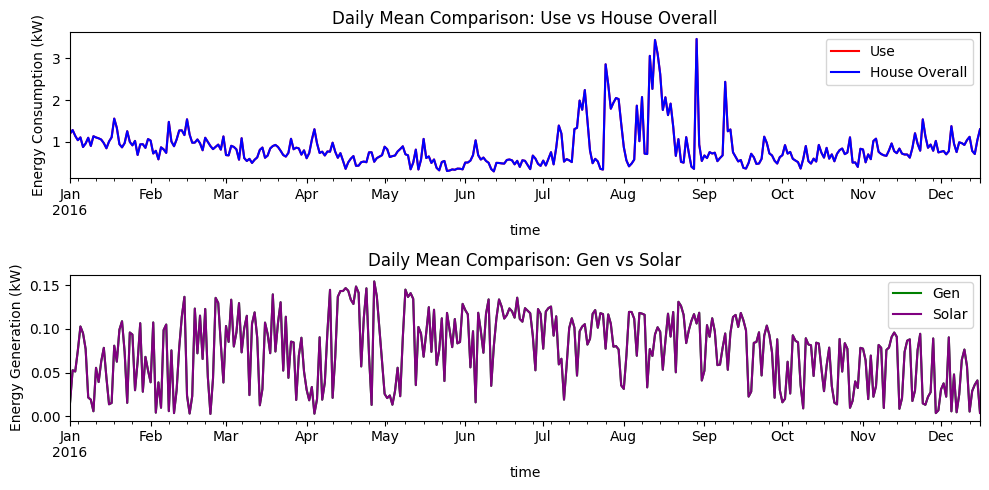

In [14]:
# Visualizing the overlap between pairs of columns with perfect correlation
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Find the full date range in the dataset
min_date = data.index.min()
max_date = data.index.max()

# Plot daily mean of 'use' and 'House overall' for comparison
data[['use', 'House overall']].resample('D').mean().plot(ax=axes[0], color=['red', 'blue'], title='Daily Mean Comparison: Use vs House Overall')
axes[0].set_xlim(min_date, max_date)  # Set x-axis limits to full date range

# Plot daily mean of 'gen' and 'Solar' for comparison
data[['gen', 'Solar']].resample('D').mean().plot(ax=axes[1], color=['green', 'purple'], title='Daily Mean Comparison: Gen vs Solar')
axes[1].set_xlim(min_date, max_date)  # Set x-axis limits to full date range

# Enhance plot readability
axes[0].set_ylabel('Energy Consumption (kW)')
axes[0].legend(['Use', 'House Overall'])
axes[1].set_ylabel('Energy Generation (kW)')
axes[1].legend(['Gen', 'Solar'])

plt.tight_layout()


In [15]:
# Remove the 'use' and 'gen' columns as they are perfectly correlated with 'House overall' and 'Solar' respectively,
data.drop(['use', 'gen'], axis=1, inplace=True)


### Plot of Daily Mean Values of Energy-Related Features

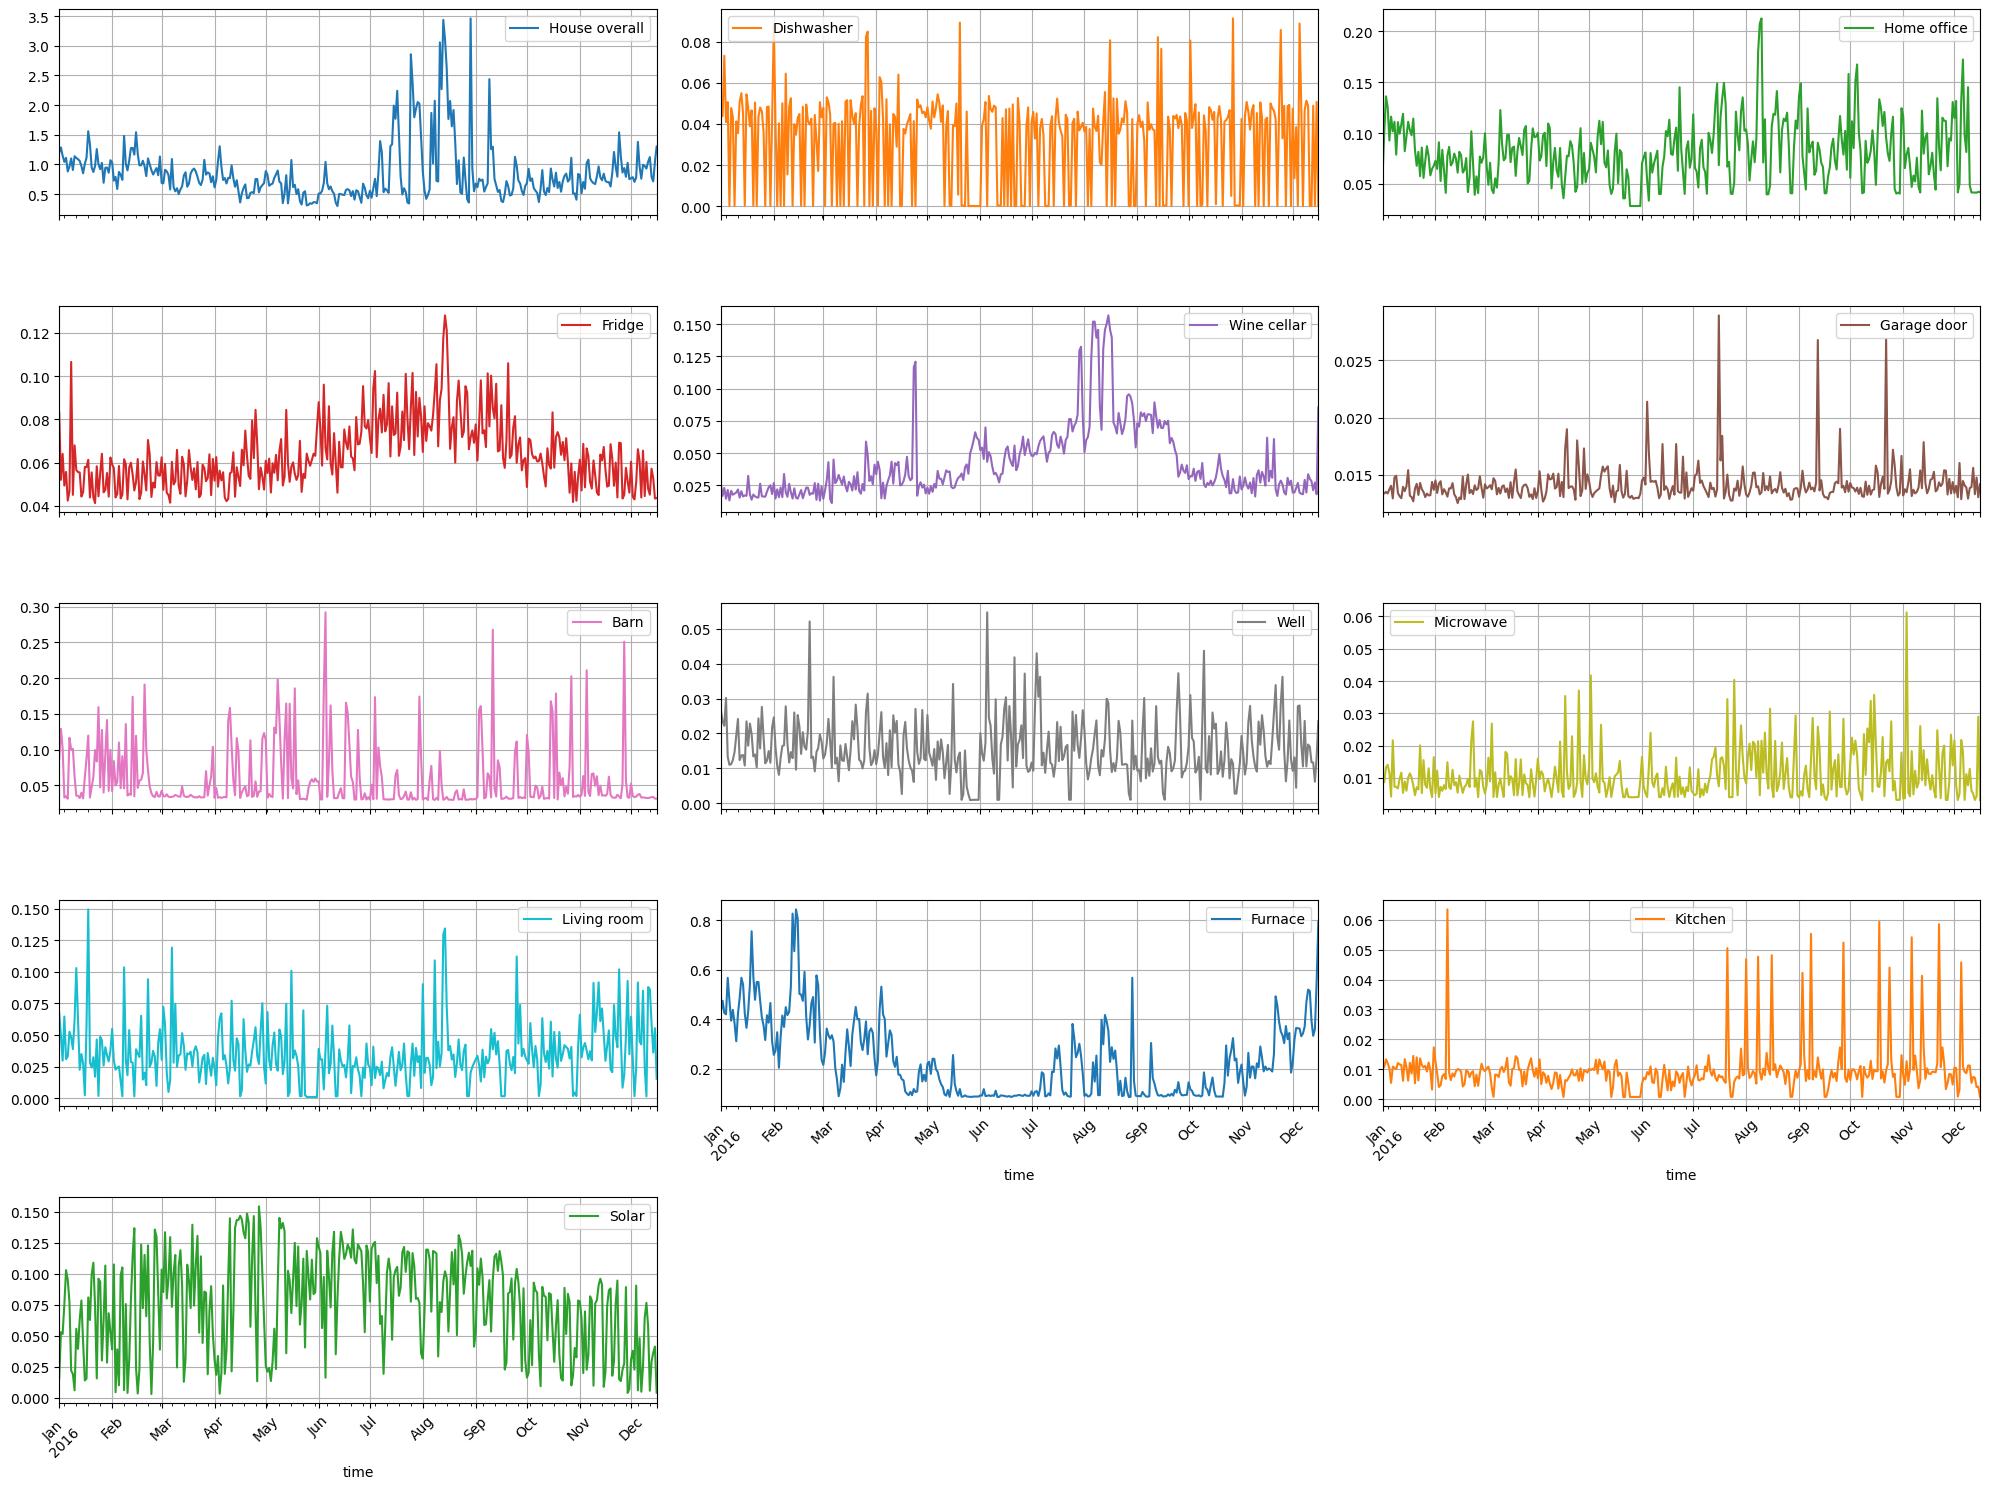

In [16]:
# the first 13 columns are energy-related
energy_columns = data.columns[:13].tolist()

# We want 3 columns in our layout
n_cols = 3
n_rows = -(-len(energy_columns) // n_cols)  # Ceiling division to get enough rows

# Resample by day (rule='D') and calculate the mean for the energy columns
data[energy_columns].resample("D").mean().plot(
    subplots=True,
    layout=(n_rows, n_cols),  # Specify the layout of subplots
    figsize=(20, n_rows * 3),
    grid=True,
    rot=45,  # Rotate x-axis labels
    sharex=True  # Share the x-axis to align the dates
)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


### Weather Features

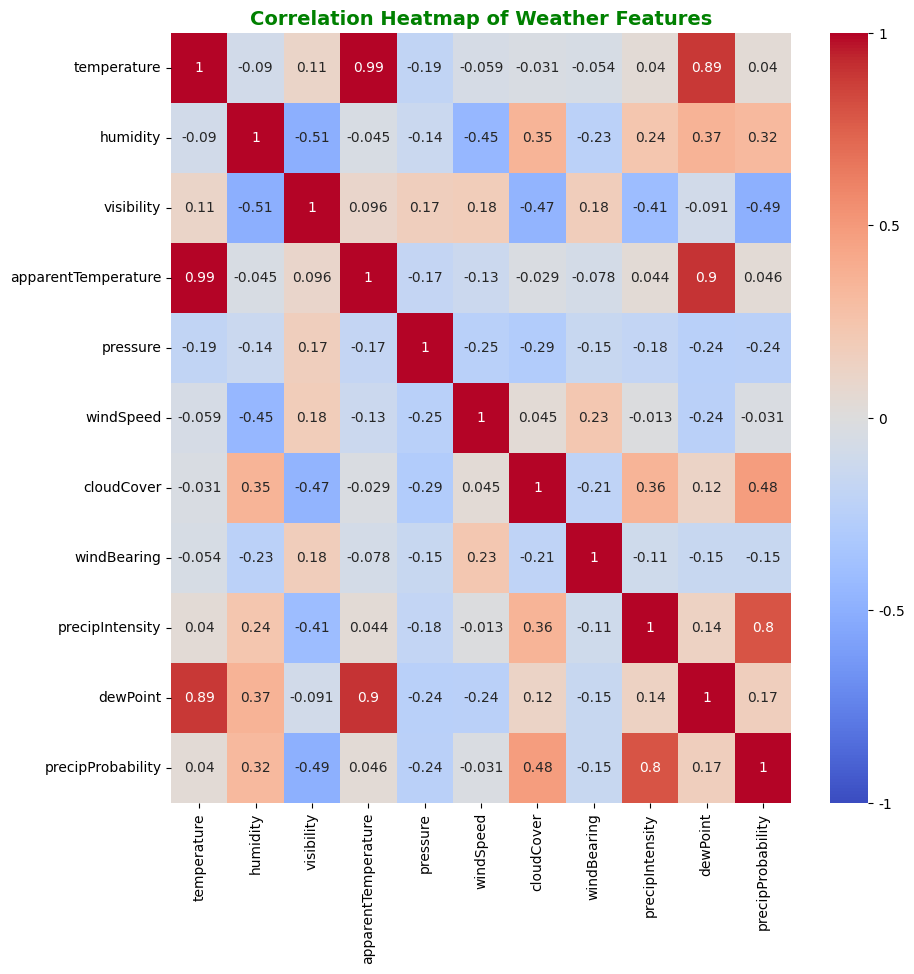

In [17]:
# Checking Correlations among weather-related features only
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a heatmap for the correlation matrix of the weather-related columns in the DataFrame
sns.heatmap(data[data.columns[13:].tolist()].corr(), annot=True, cmap='coolwarm', vmin=-1.0, vmax=1.0, center=0, ax=ax)

# Adding a title with a specified font size
plt.title('Correlation Heatmap of Weather Features', fontsize=14, weight='bold', color='green')

# add a color bar
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])

plt.show()


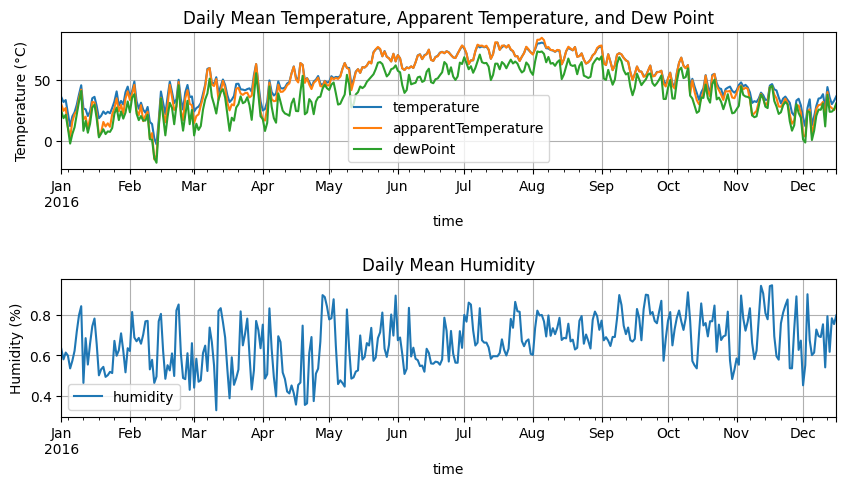

In [18]:
# Analyze daily correlations between temperature-related features and humidity
fig, axes = plt.subplots(2, 1, figsize=(10, 5))

# Plot the daily mean of temperature, apparent temperature, and dew point
data[['temperature', 'apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
axes[0].set_title('Daily Mean Temperature, Apparent Temperature, and Dew Point')
axes[0].set_ylabel('Temperature (°C)')

# Plot the daily mean of humidity
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)
axes[1].set_title('Daily Mean Humidity')
axes[1].set_ylabel('Humidity (%)')

plt.subplots_adjust(hspace=0.8)

plt.show()


# Data Modelling

## 1. Baseline Model : Moving Average for reference

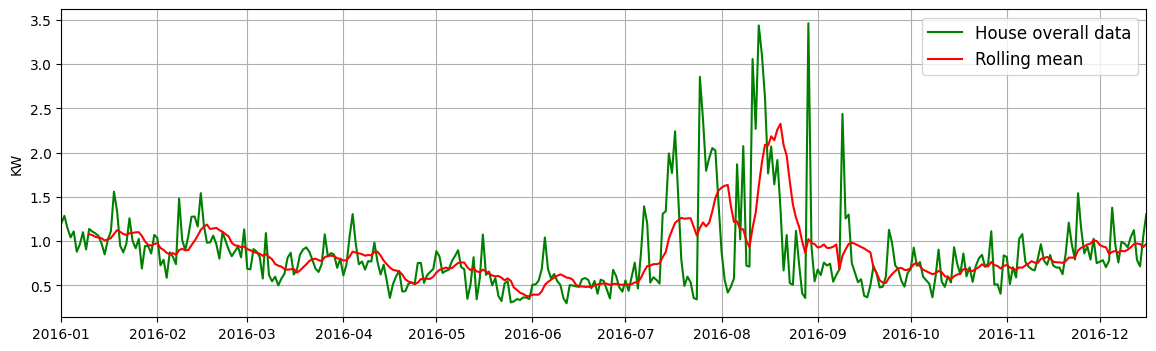

In [19]:
# Data resampling by day
daily_data = data['House overall'].resample('d').mean() #'d' stands for daily
#define moving average with window  =10
baseline_data = daily_data.rolling(window=10).mean() # window =10 specifies the size of moving window
plt.figure(figsize=(14,4))
plt.plot(daily_data, c= 'green', label = 'House overall data')
plt.plot(baseline_data, c= 'red', label = 'Rolling mean')
plt.legend(fontsize=12)
plt.ylabel('KW')
plt.margins(x=0)
plt.grid()

### Data Split for the Baseline Model

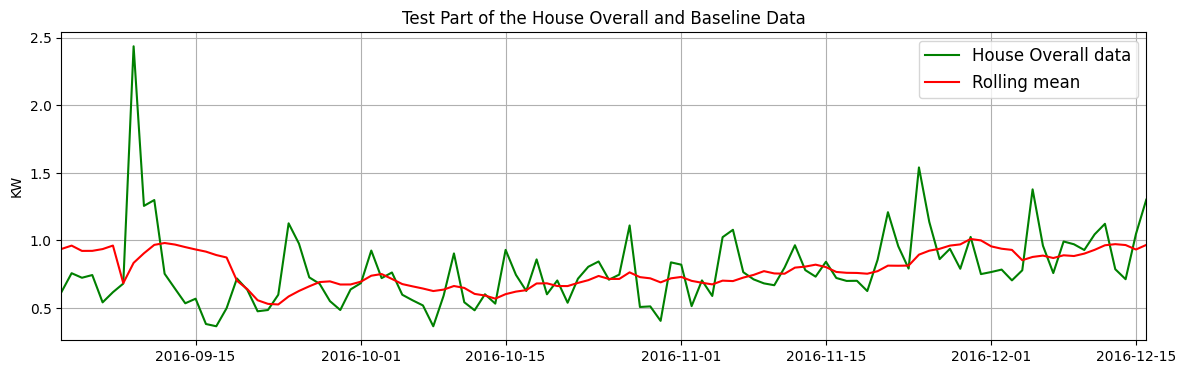

                                  
                                   
Mean Squared Error (MSE) : 0.071
Root Mean Squared Error (RMSE) : 0.266
Mean Absolute Error (MAE) : 0.177
Mean Absolute Percentage Error (MAPE): 0.236
Mean Absolute Scaled Error (MASE) : 0.913
R^2 Score : 0.077


In [20]:
# function to split the time series data
def split_time_series(series, split_ratio = 0.7):
    split_index = int(len(series) * split_ratio)
    return series[:split_index], series[split_index:]

# splititng the dataset
train_data,  test_data = split_time_series(daily_data)
baseline_test_data = baseline_data[test_data.index[0]:]

# plotting
plt.figure(figsize=(14,4))
plt.plot(test_data, color = 'green', label = "House Overall data")
plt.plot(baseline_test_data, color = 'red', label = "Rolling mean")
plt.legend(fontsize=12)
plt.ylabel('KW')
plt.margins(x=0)
plt.title("Test Part of the House Overall and Baseline Data")
plt.grid()
#plt.xticks(rotation = 45)
plt.show()

# function to calculate the error metrics
def calculate_errors(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred) # mean squared error
    rmse = np.sqrt(mse) # root mean squared error
    mae = mean_absolute_error(y_true, y_pred) #mean absolute error
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) # mean absolute percentage error
    mase_denominator = np.abs(np.diff(y_true[:int(len(y_true)*0.7)])).sum() / (len(y_true[:int(len(y_true)*0.7)])-1)
    mase = np.mean(np.mean(np.abs(y_true - y_pred)) / mase_denominator) #mean absolute scaled error
    r2 = r2_score(y_true, y_pred) # R^2 squared
    return mse, rmse, mae, mape, mase, r2


print("                                  ")
print("                                   ")

# calculate the error metrics
mse, rmse, mae, mape, mase, r2 = calculate_errors(test_data, baseline_test_data)
print(f'Mean Squared Error (MSE) : {mse:.3f}')
print(f'Root Mean Squared Error (RMSE) : {rmse:.3f}')
print(f'Mean Absolute Error (MAE) : {mae:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}')
print(f'Mean Absolute Scaled Error (MASE) : {mase:.3f}')
print(f'R^2 Score : {r2:.3f}')



# ARIMA ( Auto Regressive Integrated Moving Average )

### The first step to build an ARIMA Model is to make the time series stationary.
### **ADF** test : **Augmented Dickey Fuller test** - The null hypothesis of the ADF Test is that the time series is non-stationary. so, if the p-value of the ADF test is less than the significance level (0.05) then we reject the null hypothesis and infer that the time series is indeed stationary.

In [23]:
from statsmodels.tsa.stattools import adfuller

# Apply the Augmented Dickey-Fuller test to check for stationarity in the 'daily_data' time series
# 'autolag' is set to 'AIC' to determine the number of lags that provides the best fit for the model
ADF_test_result = adfuller(daily_data, autolag = 'AIC')
# Extract the test results and place them into a pandas Series with appropriate index labels
output = pd.Series(ADF_test_result[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observation Used'])
print("Augmented Dickey Fuller test Results: \n\n{}".format(output))


Augmented Dickey Fuller test Results: 

Test Statistic                 -2.988003
p-value                         0.036030
Lags Used                      10.000000
Number of Observation Used    340.000000
dtype: float64


We can conclude that since the p-value is less than 0.05 (5%), there is sufficient evidence to reject the null hypothesis of the presence of a unit root. In other words, we can say that the time series data is stationary and now  we can consider proceeding with ARIMA (AutoRegressive Integrated Moving Average) modeling, which requires the time series data to be stationary.

# Model Training using ARIMA

In [24]:
# print the  number of data points in the full dataset, training and test series
print("Number of point in full data series :", len(daily_data))
print("Number of points in training data:", len(train_data))
print("Number of points in testing data:", len(test_data))


Number of point in full data series : 351
Number of points in training data: 245
Number of points in testing data: 106


In [25]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

#initialize the ARIMA model with the order (2,1,1) on the training data
model = ARIMA(train_data, order = (2,1,1))

# fit the ARIMA Model to the training data
fitted_model = model.fit()

#print the Akaike Information Criterion (AIC) value for the fitted model
print("Akaike Information Criterion :", fitted_model.aic)

Akaike Information Criterion : 258.4623694604352


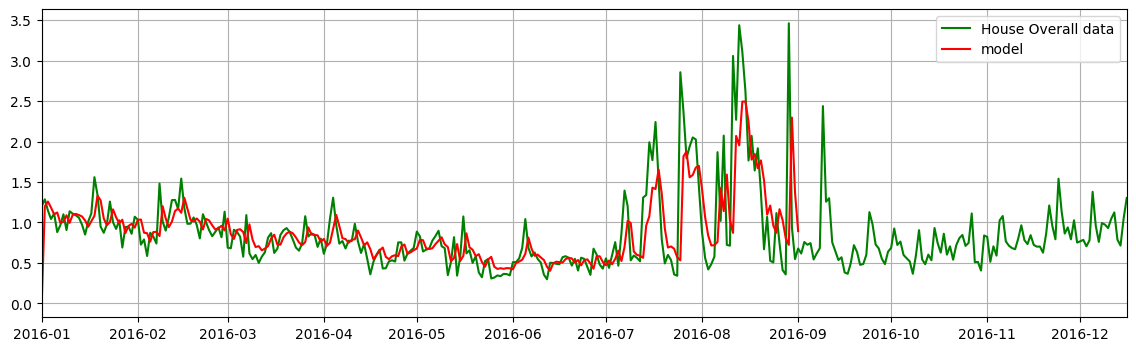

                               SARIMAX Results                                
Dep. Variable:          House overall   No. Observations:                  245
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -125.231
Date:                Wed, 14 Feb 2024   AIC                            258.462
Time:                        19:49:32   BIC                            272.451
Sample:                    01-01-2016   HQIC                           264.096
                         - 09-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4590      0.051      9.051      0.000       0.360       0.558
ar.L2          0.0999      0.037      2.667      0.008       0.026       0.173
ma.L1         -0.9438      0.026    -35.670      0.0

In [29]:
# plot the oriignal data and the fitted model predictions
plt.figure(figsize=(14,4))
plt.plot(daily_data, c = 'green', label = 'House Overall data')
plt.plot(fitted_model.predict(dynamic=False), c = 'red',  label = 'model')
plt.legend()
plt.grid()
plt.margins(x=0)
plt.show()

# print the summary of the fitted model
print(fitted_model.summary())

# Diagnostics of ARIMA Model Fit

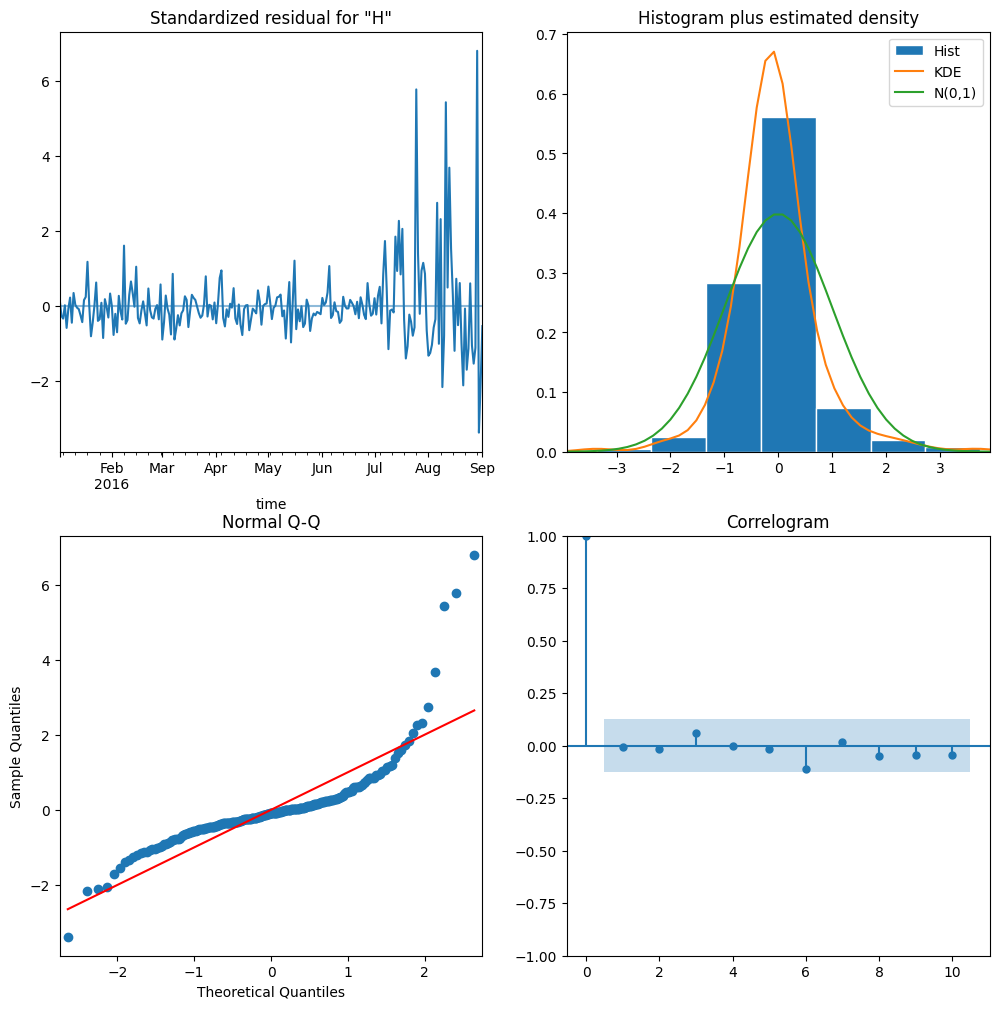

In [33]:
fitted_model.plot_diagnostics(figsize=(12,12))
plt.show()

# ARIMA Model Residuals

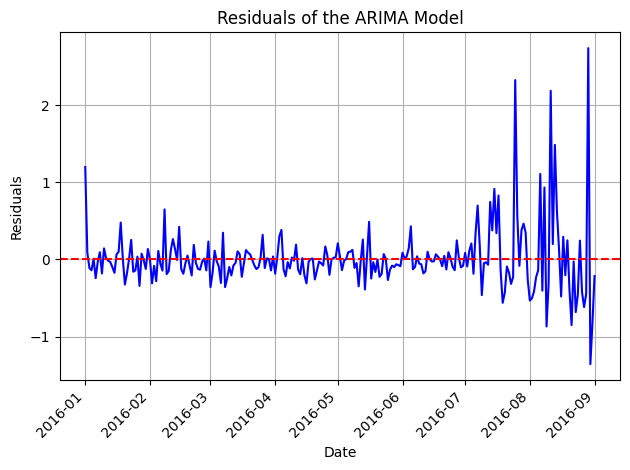

In [43]:
# Extract the residuals
residuals = fitted_model.resid

#plotting the residuals
plt.plot(figsize=(14,4))
plt.plot(residuals , color ='blue')
plt.xticks(rotation = 45, ha ='right')
plt.title("Residuals of the ARIMA Model")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.axhline(y=0, color= 'r', linestyle = "--") # Add a horizontal line at 0 for reference
plt.grid(True)
plt.tight_layout()
plt.show()

# ARIMA Model Single Forecast

MSE (Mean Squared Error) for Single Forecast ARIMA Model: 0.229
RMSE (Root Mean Squared Error) for Single Forecast ARIMA Model: 0.479
MAE (Mean Absolute Error) for Single Forecast ARIMA Model: 0.431
MAPE (Mean Absolute Percentage Error) for Single Forecast ARIMA Model: 0.672%
MASE (Mean Absolute Scaled Error) for Single Forecast ARIMA Model: 1.752
R^2 Score for Single Forecast ARIMA Model: -1.991
 ******************************************************** PLOT *********************************************


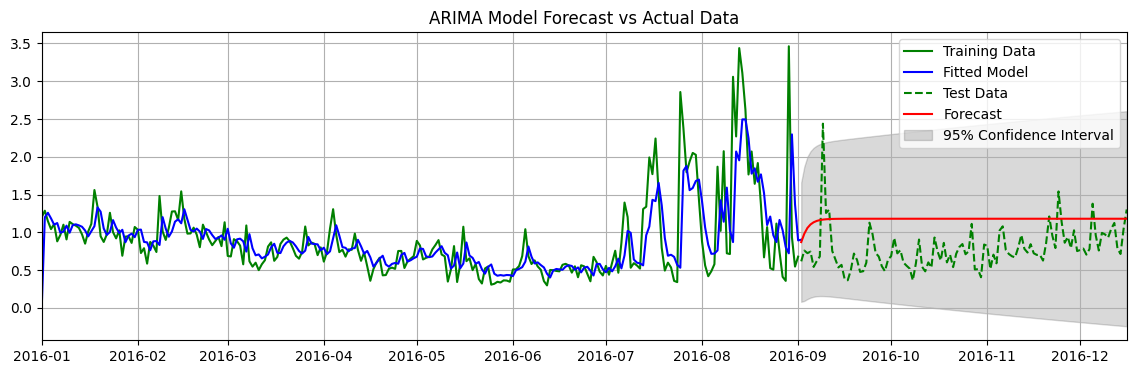

In [50]:
# calculate the starting index for appending based on the length of train data
start_append_index = len(train_data)
# append one new observations from the daily_data to the fitted model without refitting the model
new_fit = fitted_model.append(daily_data[start_append_index:start_append_index+1], refit = False)
# forecast the values for the test set
forecast = new_fit.forecast(len(test_data))
# get the confidence intervals for the forecast at the 95% level
confidence = new_fit.get_forecast(len(test_data)).conf_int(0.05)


# calculate and print the error metrics
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, forecast)
mape = np.mean(np.abs(forecast - test_data) / np.abs(test_data))
mase = np.mean(np.abs(test_data - forecast)) / (np.abs(np.diff(train_data)).sum()/ (len(train_data)-1))
r2 = r2_score(test_data, forecast)

print(f'MSE (Mean Squared Error) for Single Forecast ARIMA Model: {mse:.3f}')
print(f'RMSE (Root Mean Squared Error) for Single Forecast ARIMA Model: {rmse:.3f}')
print(f'MAE (Mean Absolute Error) for Single Forecast ARIMA Model: {mae:.3f}')
print(f'MAPE (Mean Absolute Percentage Error) for Single Forecast ARIMA Model: {mape:.3f}%')
print(f'MASE (Mean Absolute Scaled Error) for Single Forecast ARIMA Model: {mase:.3f}')
print(f'R^2 Score for Single Forecast ARIMA Model: {r2:.3f}')

print(" ******************************************************** PLOT *********************************************")

# plotting the training data, fitted model , test data , forecast and conidence intervals
plt.figure(figsize = (14,4))
plt.plot(train_data, c = 'green', label = "Training Data")
plt.plot(new_fit.predict(dynamic=False), c = 'blue', label = 'Fitted Model')
plt.plot(test_data.index, test_data, c = 'green', label = 'Test Data', linestyle = '--')
plt.plot(test_data.index , forecast, c = 'red', label = 'Forecast')
plt.fill_between(test_data.index, confidence.iloc[:,0], confidence.iloc[:,1], color ='k', alpha =.15, label = '95% Confidence Interval')

plt.title("ARIMA Model Forecast vs Actual Data")
plt.legend()
plt.grid()
plt.margins(x =0)
plt.show()


# ARIMA Model Time Series Cross Validation (Rolling Forecast)

MSE (Mean Squared Error) for Rolling Forecast ARIMA Model: 0.069
RMSE (Root Mean Squared Error) for Rolling Forecast ARIMA Model: 0.263
MAE (Mean Absolute Error) for Rolling Forecast ARIMA Model: 0.176
MAPE (Mean Absolute Percentage Error) for Rolling Forecast ARIMA Model: 0.229%
MASE (Mean Absolute Scaled Error) for Rolling Forecast ARIMA Model: 0.715
R^2 Score for Rolling Forecast ARIMA Model: 0.094
 ******************************************************** PLOT *********************************************


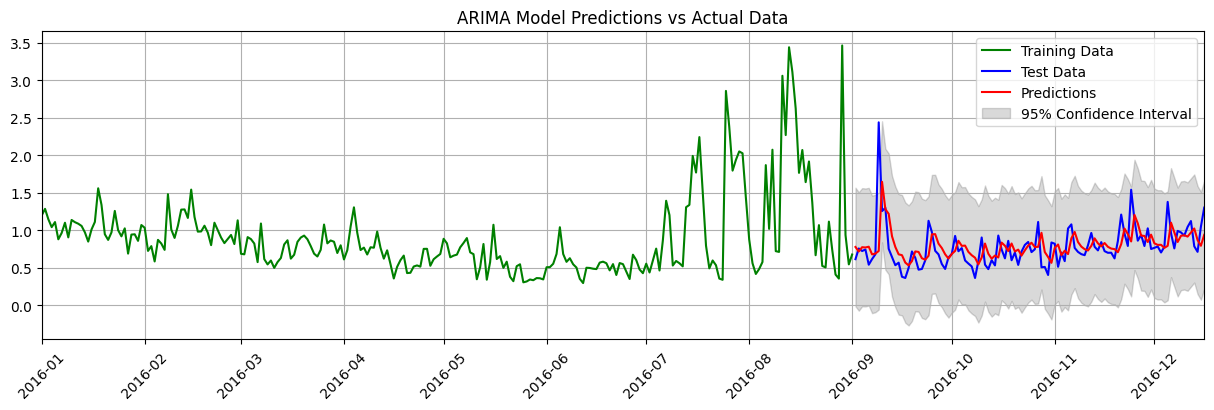

In [52]:
# Preparing for walk-forward validation
predictions = []
confidence_intervals = []
history = list(train_data)

# Walk-forward validation over the test set
for t in range(len(test_data)):
    # Fit the ARIMA model on the history and make a forecast for the next time point
    model = ARIMA(history, order=(2,0,1))
    model_fit = model.fit()
    output = model_fit.forecast().tolist()
    conf_int = model_fit.get_forecast().conf_int(0.05)

    # Store the forecast and confidence interval
    predictions.extend(output)
    confidence_intervals.extend(conf_int)

    # Add the actual observation to the history for the next loop
    history.append(test_data[t])

# Convert confidence intervals to a numpy array
conf_int_array = np.vstack(confidence_intervals)

# Adjust index for plotting predictions with confidence intervals
predictions_series = pd.Series(predictions, index=daily_data.index[start_append_index:start_append_index+len(predictions)])

# Create a DataFrame for confidence intervals
confidence_df = pd.DataFrame(conf_int_array, columns=['lower', 'upper'], index=predictions_series.index)


# Evaluate forecasts
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, predictions)
mape = np.mean(np.abs(predictions - test_data) / np.abs(test_data))
mase = np.mean(np.abs(test_data - predictions)) / (np.abs(np.diff(train_data)).sum() / (len(train_data) - 1))
r2 = r2_score(test_data, predictions)

print(f'MSE (Mean Squared Error) for Rolling Forecast ARIMA Model: {mse:.3f}')
print(f'RMSE (Root Mean Squared Error) for Rolling Forecast ARIMA Model: {rmse:.3f}')
print(f'MAE (Mean Absolute Error) for Rolling Forecast ARIMA Model: {mae:.3f}')
print(f'MAPE (Mean Absolute Percentage Error) for Rolling Forecast ARIMA Model: {mape:.3f}%')
print(f'MASE (Mean Absolute Scaled Error) for Rolling Forecast ARIMA Model: {mase:.3f}')
print(f'R^2 Score for Rolling Forecast ARIMA Model: {r2:.3f}')

print(" ******************************************************** PLOT *********************************************")

# Plotting the results
plt.figure(figsize=(15,4))
plt.plot(daily_data.index[:start_append_index], train_data, c='green', label='Training Data')
plt.plot(daily_data.index[start_append_index:], test_data, c='blue', label='Test Data')
plt.plot(predictions_series, c='red', label='Predictions')
plt.fill_between(confidence_df.index, confidence_df['lower'], confidence_df['upper'], color='k', alpha=.15, label='95% Confidence Interval')
plt.legend()
plt.grid()
plt.margins(x=0)
plt.title('ARIMA Model Predictions vs Actual Data')
plt.xticks(rotation=45);
